Gradient Decent

$\theta_{i+1} = \theta_{i-1} - \alpha \frac{\partial{loss(\theta)}}{\partial{\theta}}$

In [182]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

Example 1 

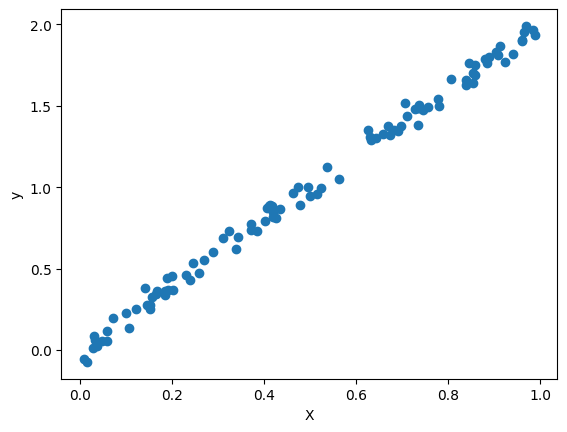

In [183]:
# Creating the dataset
n = 100
X = np.random.rand(n)
y = 2*X + 0.05*np.random.randn(n)
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [185]:
def loss_function(theta,X_tr, y_tr):
    return mean_squared_error(theta*X_tr - y_tr)

def gradient_loss_function(theta, X_tr, y_tr):
    return 2*(theta*np.sum(X_tr) - np.sum(y_tr))*np.sum(X_tr)

def model(theta, X_t):
    return theta*X_t

0.8652535614374389


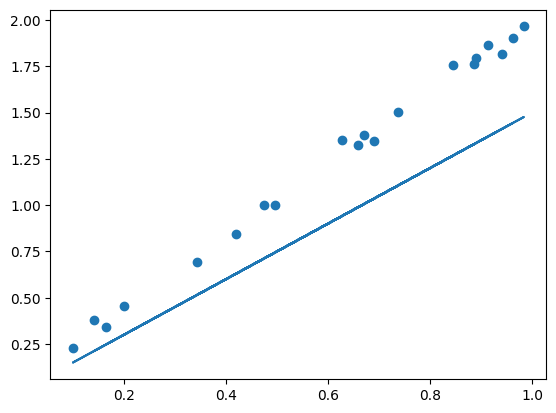

1.5004454912753764


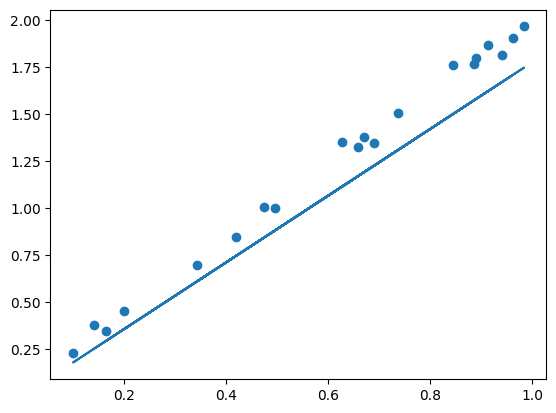

1.7742923945182338


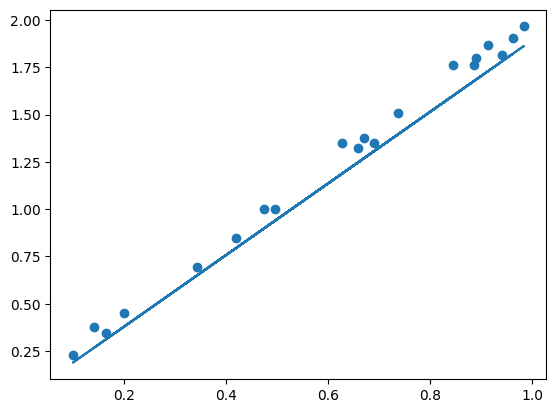

1.892354546905523


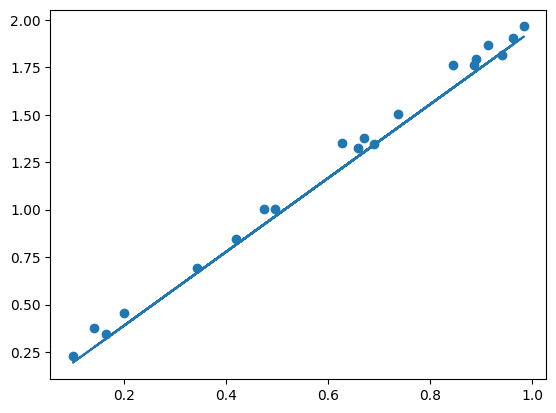

1.9432540519255166


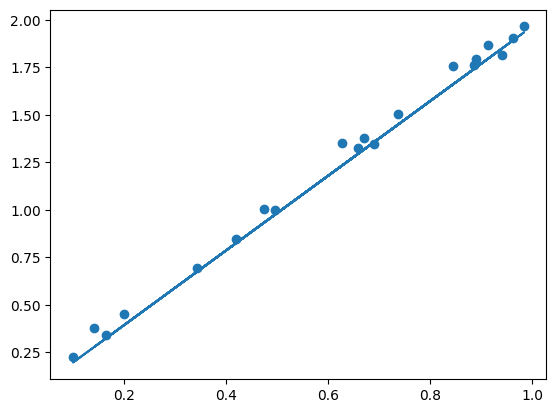

In [186]:
max_iterations = 5
alpha = 0.2
theta = np.random.rand() # initializing theta
for i in range(max_iterations):
    print(theta)
    theta = theta - 0.0002*gradient_loss_function(theta, X_train, y_train)  # learning theta
    plt.scatter(X_test, y_test)
    plt.plot(X_test, model(theta, X_test))
    plt.show()

We can see the performance of the model improves as we use gradient decent to train.

Regular Gradient Decent

In [187]:
# Creating the dataset
data = load_diabetes()
X = data['data']
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [188]:
# loss function
def loss_function_gradient(theta, i, X_t, y_t): 
    return -2*np.sum((y_t - X_t@theta)*X_t[:,i])/len(X_t)

# initializing theta
theta = np.random.rand(X_train.shape[1])
alpha = 0.0002

# Regular Gradient Decent
max_iterations = 1000
for i in range(max_iterations):
    for j in range(len(theta)):
        theta[j] = theta[j] - alpha*(loss_function_gradient(theta, j, X_train, y_train))

y_hat = X_test@theta

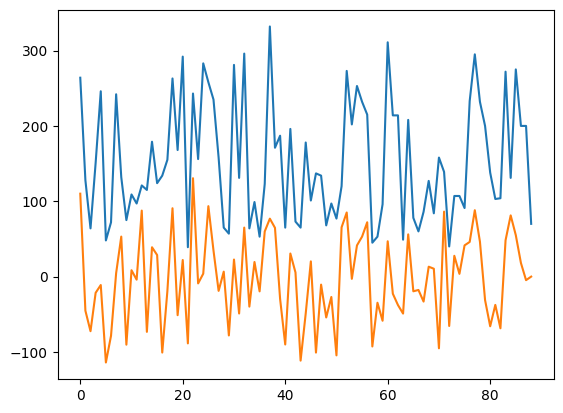

In [189]:
sno = np.arange(len(y_test))
plt.plot(sno, y_test)
plt.plot(sno, y_hat)
plt.show()

Now, we intend to add more polynomial features to train over

In [190]:
trans = PolynomialFeatures(degree = 2)
X_train_with_pf = trans.fit_transform(X_train)
X_test_with_pf = trans.fit_transform(X_test)

In [191]:
# Training

# loss function
def loss_function_gradient(theta, i, X_t, y_t): 
    return -2*np.sum((y_t - X_t@theta)*X_t[:,i])/len(X_t)

# initializing theta
theta = np.random.rand(X_train_with_pf.shape[1])
alpha = 0.2

# Regular Gradient Decent
max_iterations = 1000
for i in range(max_iterations):
    for j in range(len(theta)):
        theta[j] = theta[j] - alpha*(loss_function_gradient(theta, j, X_train_with_pf, y_train))
y_hat = X_test_with_pf@theta

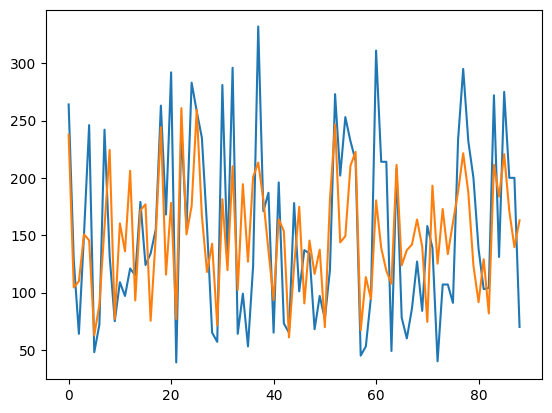

In [192]:
sno = np.arange(len(y_test))
plt.plot(sno, y_test)
plt.plot(sno, y_hat)
plt.show()

In [193]:
# loss
mean_squared_error(y_test, y_hat)

3499.5579224877933

Stochastic Gradient Decent

In [ ]:
# creating the dataset

data = load_diabetes()
X = data['data']
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [207]:
# loss function
def loss_function_stochastic_gradient(theta, i, X_t, j, y_t): 
    return -2*((y_t[j] - X_t[j]@theta)*X_t[j][i])/len(X_t)

# initializing theta
theta = np.random.rand(X_train.shape[1])
alpha = 0.2

# Stochastic Gradient Decent
max_iterations = 1000
for i in range(max_iterations):
    for k in range(len(X_train)):
        for j in range(len(theta)):
            theta[j] = theta[j] - alpha*(loss_function_stochastic_gradient(theta, j, X_train,k, y_train))

y_hat = X_test@theta

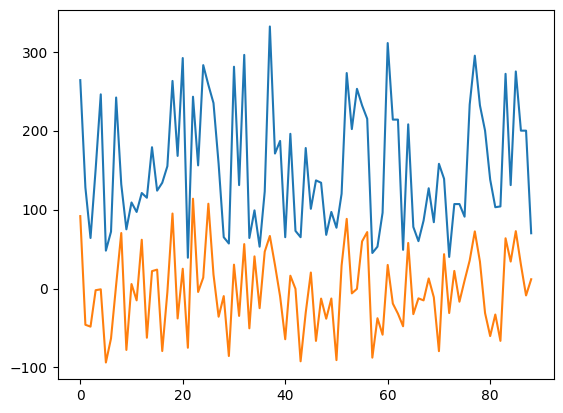

In [208]:
# plotting prediction
sno = np.arange(len(y_test))
plt.plot(sno, y_test)
plt.plot(sno, y_hat)
plt.show()

Adding more features into the dataset

In [209]:
# adding polynomial features
trans = PolynomialFeatures(degree = 2)
X_train_with_pf = trans.fit_transform(X_train)
X_test_with_pf = trans.fit_transform(X_test)

In [211]:
# loss function
def loss_function_stochastic_gradient(theta, i, X_t, j, y_t): 
    return -2*((y_t[j] - X_t[j]@theta)*X_t[j][i])/len(X_t)

# initializing theta
theta = np.random.rand(X_train_with_pf.shape[1])
alpha = 0.2

# Stochastic Gradient Decent
max_iterations = 1000
for i in range(max_iterations):
    for k in range(len(X_train_with_pf)):
        for j in range(len(theta)):
            theta[j] = theta[j] - alpha*(loss_function_stochastic_gradient(theta, j, X_train_with_pf,k, y_train))

y_hat = X_test_with_pf@theta

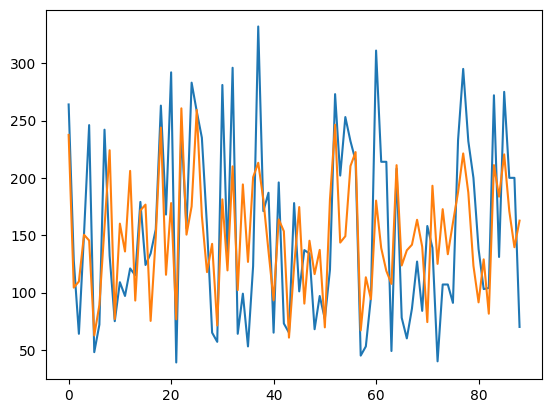

In [212]:
# plotting prediction
sno = np.arange(len(y_test))
plt.plot(sno, y_test)
plt.plot(sno, y_hat)
plt.show()

In [213]:
# loss
mean_squared_error(y_test, y_hat)

3501.1240409325887